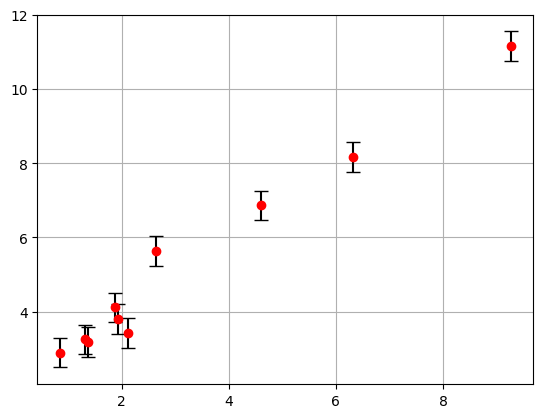

m = 0.994 +/- 0.049
q = 2.039 +/- 0.204
success of the fit:  True
value of the fit Q-squared 10.405203888193805
value of the calculated Q-squared 10.405203888193805
value of the number of degrees of freedom 8.0
┌───┬─────────────────┐
│   │       m       q │
├───┼─────────────────┤
│ m │ 0.00244 -0.0079 │
│ q │ -0.0079  0.0415 │
└───┴─────────────────┘
┌───┬───────────┐
│   │    m    q │
├───┼───────────┤
│ m │    1 -0.8 │
│ q │ -0.8    1 │
└───┴───────────┘


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.41 (χ²/ndof = 1.3)      │              Nfcn = 39               │
│ EDM = 6.22e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   0.99    │   0.05    │            │            │         │         │       │
│ 1 │ q    │   2.04    │   0.20    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       m       q │
├───┼─────────────────┤
│ m │ 0.00244 -0.0079 │
│ q │ -0.0079  0.0415 │
└───┴─────────────────┘

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import random
from iminuit import Minuit
from iminuit.cost import LeastSquares
from IPython.display import display

def func(x, m, q):
    return (m * x) + q


def generate_uniform(n, low, high):
    uniform_values = []
    for i in range(n):
        uniform_values.append(random.random() * (high - low) + low)
    return uniform_values


def generate_set(n, low, high, p1, p2, function, epsilon_fixed):
    epsilon = np.random.normal(loc=0, scale=epsilon_fixed, size=n)
    x_coord = generate_uniform(n, low, high)
    y_coord = []
    for i in range(len(x_coord)):
        y = function(x_coord[i], p1, p2) + epsilon[i]
        y_coord.append(y)
    return x_coord, y_coord


def main():
    fixed_epsilon = 0.4

    coordinates = generate_set(10, 0, 10, 1, 2, func, fixed_epsilon)
    fig, ax = plt.subplots()
    ax.errorbar(coordinates[0], coordinates[1], yerr=fixed_epsilon, fmt='o', color='red', capsize=5, capthick=1, ecolor='black')
    plt.grid()
    plt.show()

    least_squares = LeastSquares(coordinates[0], coordinates[1], fixed_epsilon, func)
    my_minuit = Minuit(least_squares, m=0, q=0)  # starting values for m and q
    my_minuit.migrad()  # finds minimum of least_squares function
    my_minuit.hesse()  # accurately computes uncertainties

    for par, val, err in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
        print(f'{par} = {val:.3f} +/- {err:.3f}')  # formatted output

    # global characteristics of the fit
    is_valid = my_minuit.valid
    print('success of the fit: ', is_valid)

    Q_squared = my_minuit.fval
    print('value of the fit Q-squared', Q_squared)

    m_fit = my_minuit.values[0]
    q_fit = my_minuit.values[1]
    calculated_q2 = 0
    for i in range(len(coordinates[0])):
        calculated_q2 += ((coordinates[1][i] - func(coordinates[0][i], m_fit, q_fit))/fixed_epsilon) ** 2
    print('value of the calculated Q-squared', calculated_q2)


    N_dof = my_minuit.ndof
    print('value of the number of degrees of freedom', N_dof)

    print(my_minuit.covariance)

    print(my_minuit.covariance.correlation())
    
    display(my_minuit)

    return

if __name__ == '__main__':
    main()